In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random as rn

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, roc_auc_score, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import xgboost as xgb

from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier

In [5]:
bookings_df = pd.read_csv(r"D:\Studia\0. SGH\Semestr 3\Data Mining\projekt_EK_AB_MJ\Hotel Reservations.csv")

In [6]:
bookings_df.shape

(36275, 19)

In [7]:
rows_num = len(bookings_df)
rows_num 

36275

In [8]:
bookings_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
bookings_df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [10]:
bookings_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [12]:
(bookings_df.isnull().sum()/len(bookings_df))

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [13]:
bookings_df.skew()

C:\Users\dell\AppData\Local\Temp\ipykernel_17444\2846682457.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bookings_df.skew()


no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
required_car_parking_space               5.413643
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
dtype: float64

In [14]:
bookings_df.rename(columns = {bookings_df.columns[0]:'ID'}, inplace = True) 

bookings_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [15]:
for col in bookings_df.select_dtypes(['object', 'category']):
    print(bookings_df[col].value_counts())

INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: ID, Length: 36275, dtype: int64
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


In [16]:
P = bookings_df.groupby('booking_status')['ID'].count().reset_index()

P['Percentage'] = 100 * P['ID']  / P['ID'].sum()
print(P)

  booking_status     ID  Percentage
0       Canceled  11885   32.763611
1   Not_Canceled  24390   67.236389


In [17]:
bookings_df.head()

,ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [18]:
# współczynnik zmienności dla każdej kolumny
cv_result = (bookings_df.std() / bookings_df.mean()) * 100

# Wyświetl wyniki
print("Współczynnik zmienności:")
print(cv_result)

C:\Users\dell\AppData\Local\Temp\ipykernel_17444\1017320341.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_result = (bookings_df.std() / bookings_df.mean()) * 100


Współczynnik zmienności:
no_of_adults                              28.115203
no_of_children                           382.457672
no_of_weekend_nights                     107.390925
no_of_week_nights                         64.006920
required_car_parking_space               559.231560
lead_time                                100.819241
arrival_year                               0.019022
arrival_month                             41.352883
arrival_date                              56.039303
repeated_guest                           616.493504
no_of_previous_cancellations            1577.476183
no_of_previous_bookings_not_canceled    1143.441915
avg_price_per_room                        33.927889
no_of_special_requests                   126.882762
dtype: float64


In [19]:
# Usuwam kolumnę 'arrival_year', ponieważ współczynnik zmienności = 0.019022; można uznać ją za quazi stałą
bookings_df.drop('arrival_year', axis = 1, inplace = True)

In [20]:
mapping = {'Canceled': 1, 'Not_Canceled': 0}
bookings_df['booking_status'] = bookings_df['booking_status'].map(mapping)

In [21]:
label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

bookings_df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(bookings_df['type_of_meal_plan'])
bookings_df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(bookings_df['room_type_reserved'])
bookings_df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(bookings_df['market_segment_type'])

bookings_df.drop('ID', axis = 1, inplace = True)

In [22]:
bookings_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,10,2,3,0,0,0,65.00,0,0
1,2,0,2,3,3,0,0,5,11,6,4,0,0,0,106.68,1,0
2,1,0,2,1,0,0,0,1,2,28,4,0,0,0,60.00,0,1
3,2,0,0,2,0,0,0,211,5,20,4,0,0,0,100.00,0,1
4,2,0,1,1,3,0,0,48,4,11,4,0,0,0,94.50,0,1


In [23]:
# wartości odstajace
q1 = bookings_df.quantile(0.25)
q3 = bookings_df.quantile(0.75)
# rozstęp ćwiartkowy
iqr = q3 - q1
l_bound = (q1 - 1.5 * iqr)
u_bound = (q1 + 1.5 * iqr)

n_oo_l = (bookings_df[iqr.index] < l_bound).sum()
n_oo_u = (bookings_df[iqr.index] > u_bound).sum()

outliers = pd.DataFrame({'low_boundary':l_bound, 'up_boundary':u_bound, 'outliers l':n_oo_l, 'outliers U': n_oo_u})
print(outliers)

                                      low_boundary  up_boundary  outliers l  \
no_of_adults                                  2.00         2.00        7834   
no_of_children                                0.00         0.00           0   
no_of_weekend_nights                         -3.00         3.00           0   
no_of_week_nights                            -2.00         4.00           0   
type_of_meal_plan                             0.00         0.00           0   
required_car_parking_space                    0.00         0.00           0   
room_type_reserved                            0.00         0.00           0   
lead_time                                  -146.50       180.50           0   
arrival_month                                -2.50        12.50           0   
arrival_date                                -14.50        30.50           0   
market_segment_type                           1.50         4.50         516   
repeated_guest                                0.00  

# PCA

<Axes: >

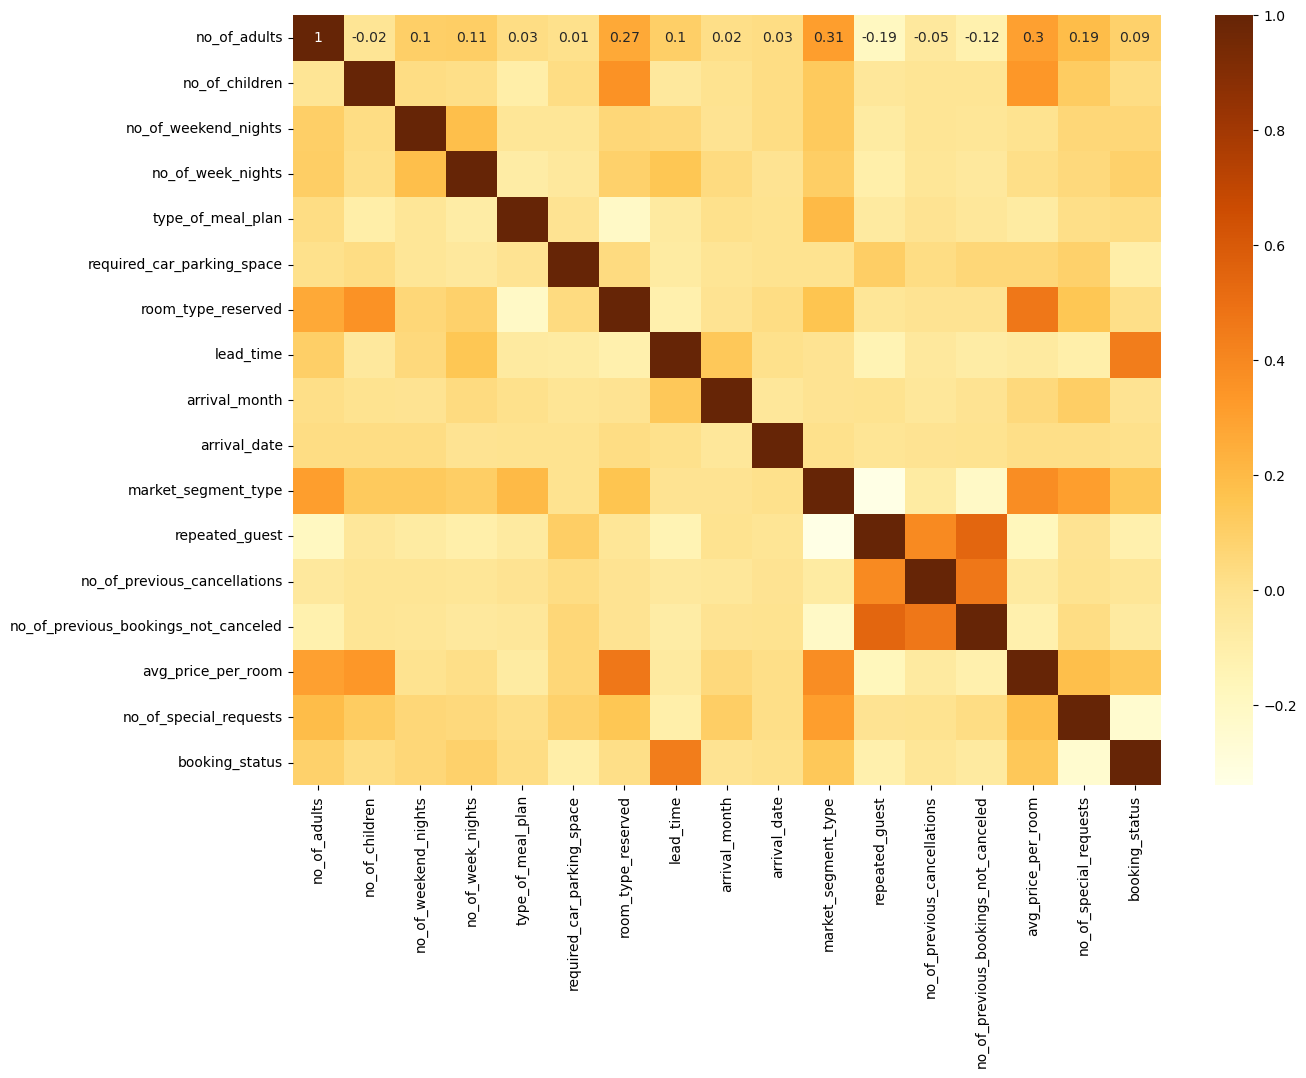

In [24]:
correlation = bookings_df.corr().round(2)
plt.figure(figsize = (14,10))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [25]:
df = bookings_df.drop(['booking_status'], axis=1)
# I will use PCA method for these columns because they represent similar features 

pca = PCA(n_components=1)
pca_no_people = pca.fit_transform(df[["no_of_adults","no_of_children"]])
df["no_of_people"] = pca_no_people

df.drop(columns=["no_of_adults","no_of_children"],inplace=True)

In [26]:
#tutaj to samo
pca_no_week = pca.fit_transform(df[["no_of_weekend_nights","no_of_week_nights"]])
df["no_of_nights"] = pca_no_week

df.drop(columns=["no_of_weekend_nights","no_of_week_nights"],inplace=True)

<Axes: >

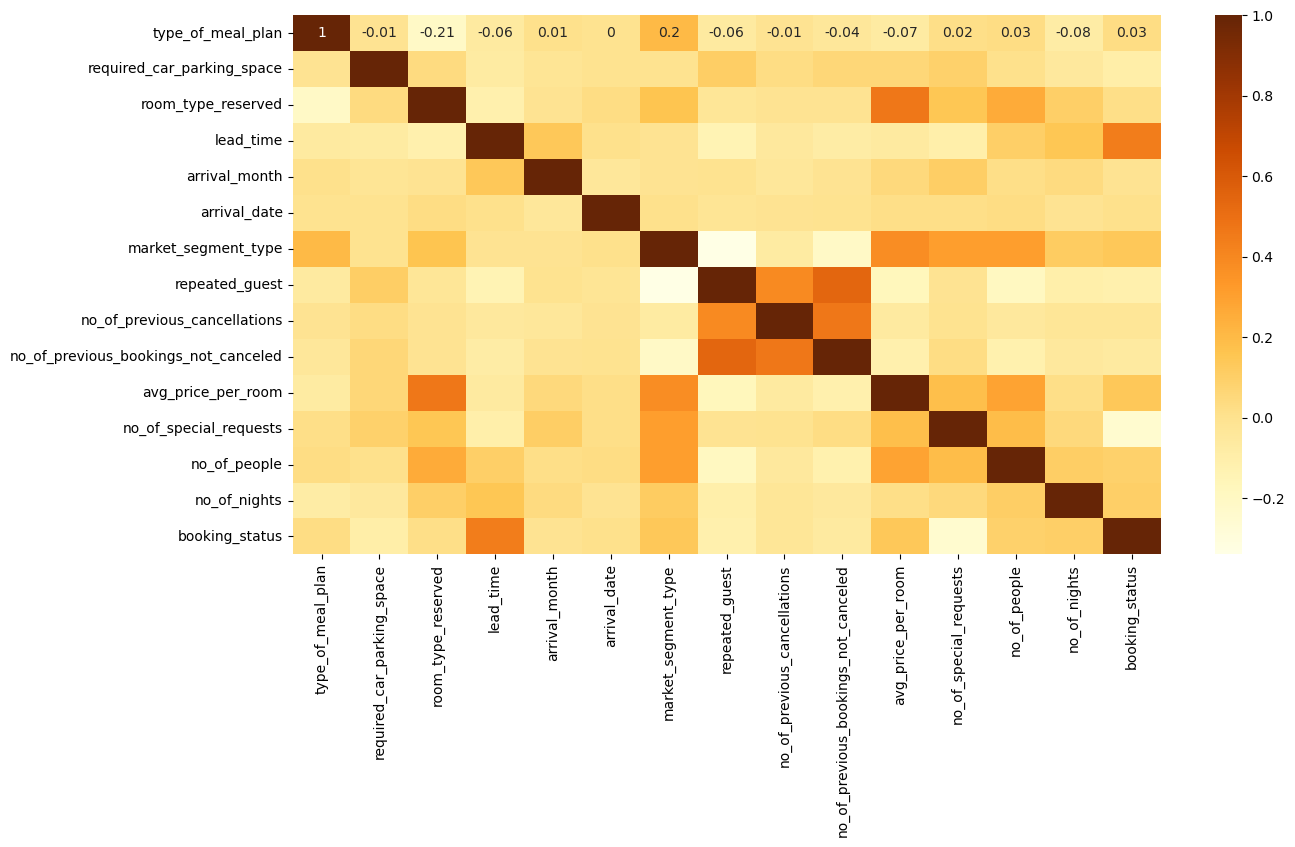

In [27]:
df = df.join(bookings_df['booking_status'])
correlation = df.corr().round(2)
correlation
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

Nie biorę pod uwagę zmiennych, które mają współczynnik korelacji < 0.09

In [28]:
df.drop(columns = ['type_of_meal_plan', 'room_type_reserved', 'arrival_month', 
                   'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'],  
        axis = 1, inplace = True)

In [29]:
df_sieci = df.copy()

In [30]:
df.columns.tolist()

['required_car_parking_space',
 'lead_time',
 'market_segment_type',
 'repeated_guest',
 'avg_price_per_room',
 'no_of_special_requests',
 'no_of_people',
 'no_of_nights',
 'booking_status']

In [31]:
df.head()

,required_car_parking_space,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,no_of_people,no_of_nights,booking_status
0,0,224,3,0,65.00,0,0.158982,-0.168923,0
1,0,5,4,0,106.68,1,0.158982,0.987358,0
2,0,1,4,0,60.00,0,-0.840274,-0.983180,1
3,0,211,4,0,100.00,0,0.158982,-0.339934,1
4,0,48,4,0,94.50,0,0.158982,-1.154192,1


#### standaryzacja danych

In [32]:
scaler = StandardScaler()
columns_to_scale = ["no_of_people", "lead_time", "repeated_guest", "avg_price_per_room", "no_of_nights", "no_of_special_requests"]

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [30]:
df.head()

,required_car_parking_space,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,no_of_people,no_of_nights,booking_status
0,0,1.614896,3,-0.16221,-1.095033,-0.78814,0.306406,-0.118593,0
1,0,-0.933701,4,-0.16221,0.092806,0.48376,0.306406,0.693180,0
2,0,-0.980250,4,-0.16221,-1.237528,-0.78814,-1.619458,-0.690247,1
3,0,1.463610,4,-0.16221,-0.097567,-0.78814,0.306406,-0.238652,1
4,0,-0.433291,4,-0.16221,-0.254312,-0.78814,0.306406,-0.810306,1


## Przygotowanie danych do drzew decyzyjnych

In [31]:
# bilansowanie próby
original_df = df.copy()
canceled_df = original_df[original_df['booking_status'] == 1]
np.random.seed(123)
not_canceled_sample = original_df[original_df['booking_status'] == 0].sample(11885, random_state=1)
final_df = pd.concat([canceled_df, not_canceled_sample])

In [32]:
# Podział zbioru na zbiór uczący i testowy
X = final_df.drop('booking_status', axis=1)
y = final_df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Drzewa decyzyjne

In [33]:
# Definiowanie siatki parametrów do przeszukiwania
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

In [34]:
# Przeszukiwanie siatki w celu znalezienia najlepszego zestawu parametrów
grid_search_params = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search_params.fit(X_train, y_train)
best_params = grid_search_params.best_params_

In [35]:
# Budowanie wstępnego modelu drzewa decyzyjnego (bez przycinania)
initial_clf = DecisionTreeClassifier(random_state=42, **best_params)
initial_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [36]:
# Przycinanie Drzewa - znalezienie optymalnego ccp_alpha
ccp_alpha_values = np.linspace(start=0.001, stop=0.02, num=50)  # Przykładowy większy zakres
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid={'ccp_alpha': ccp_alpha_values}, cv=5)
grid_search.fit(X_train, y_train)
best_ccp_alpha = grid_search.best_params_['ccp_alpha']

In [37]:
# Budowanie i trenowanie ostatecznego modelu drzewa decyzyjnego z optymalnym ccp_alpha
final_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
final_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

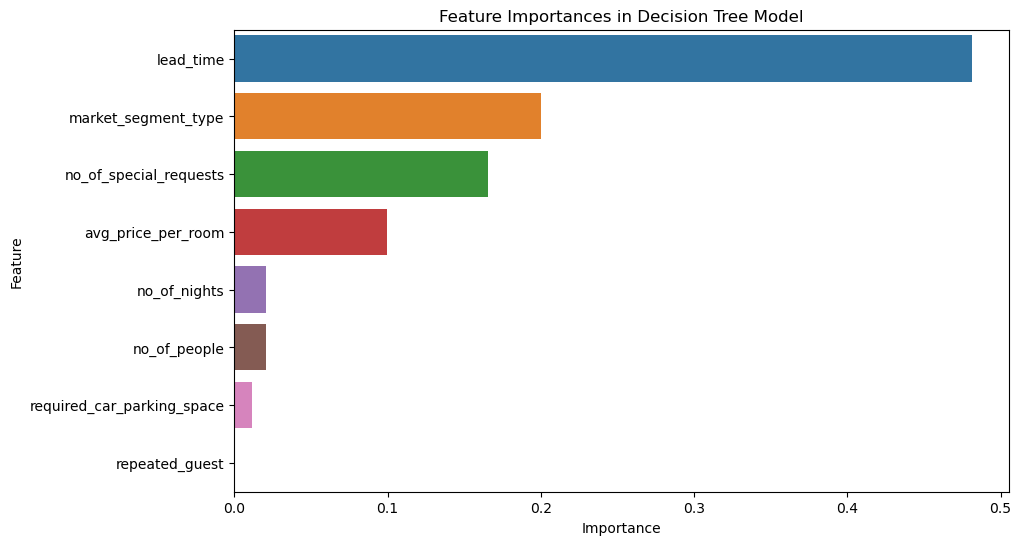

In [38]:
# Wizualizacja ważności cech
feature_importances = final_clf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

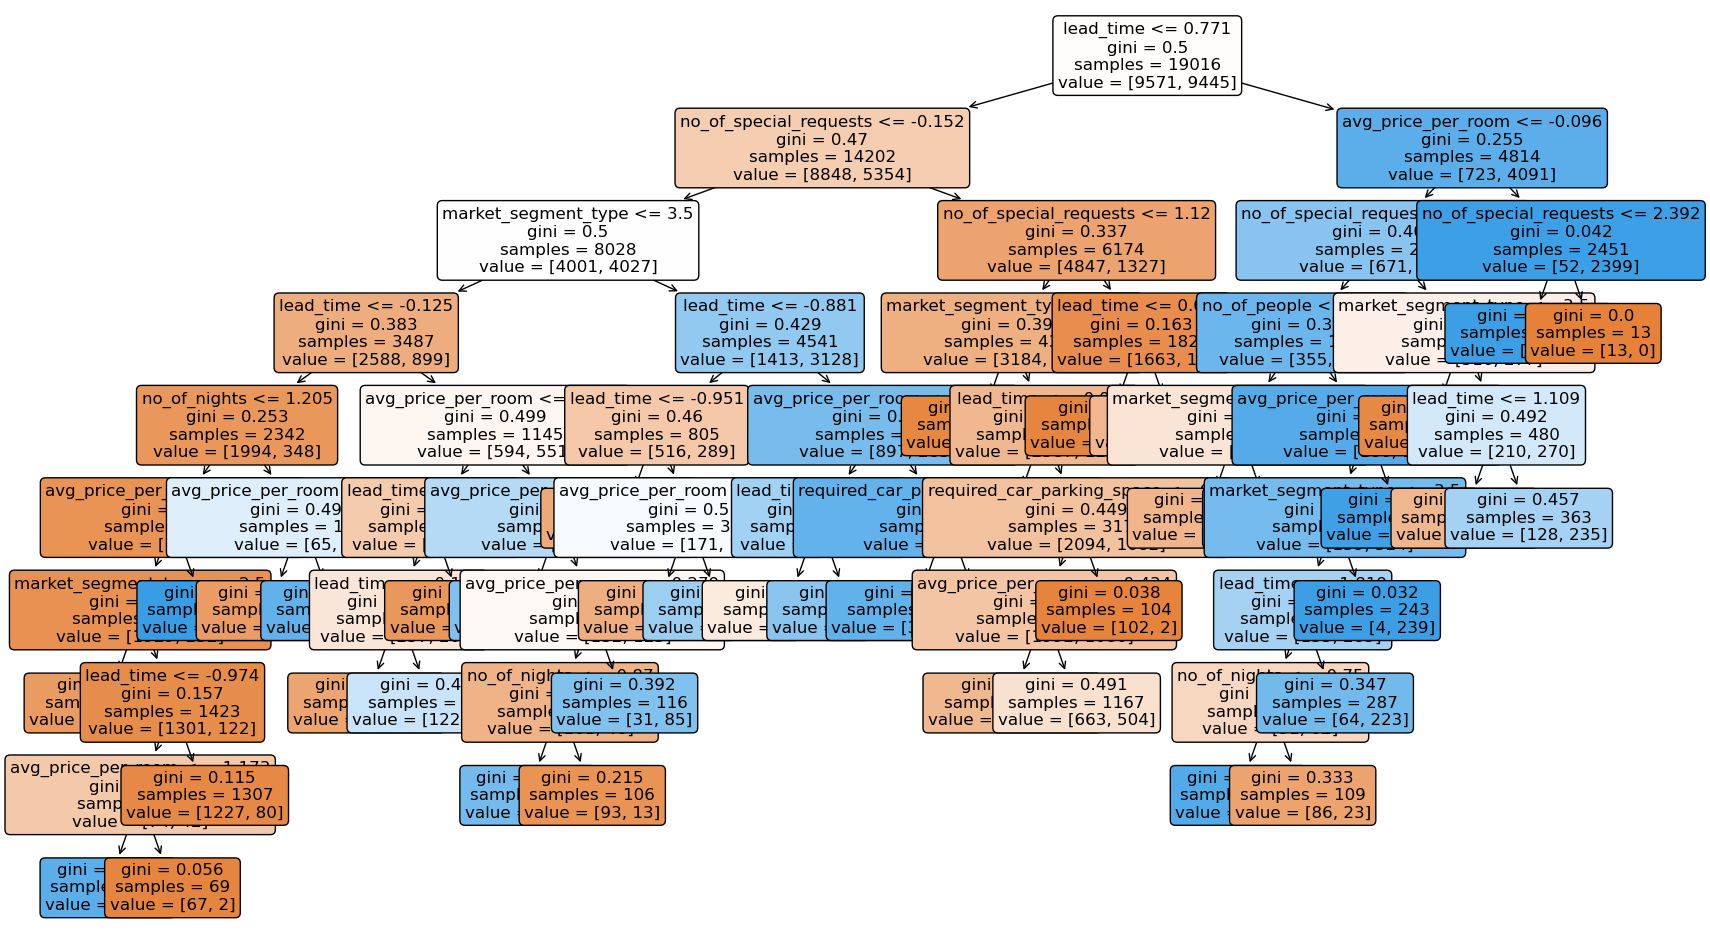

In [123]:
# Wizualizacja Ostatecznego Drzewa Decyzyjnego
plt.figure(figsize=(20, 12))
plot_tree(final_clf, 
          filled=True, 
          feature_names=X.columns.tolist(), 
          fontsize=12,
          rounded=True, 
          impurity=True)
plt.show()

In [41]:
# Dokonanie prognoz na zbiorze testowym
final_predictions = final_clf.predict(X_test)

# Obliczanie dokładności i generowanie macierzy pomyłek
accuracy = accuracy_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)
error_rate = 1 - accuracy

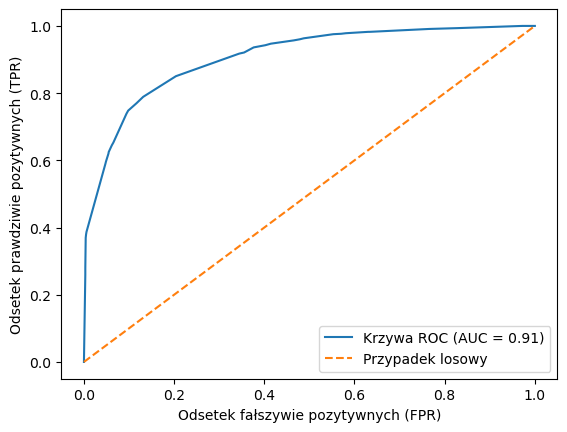

In [42]:
# Krzywa ROC i Pole pod Krzywą ROC dla ostatecznego drzewa
final_pred_proba = final_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, final_pred_proba)
roc_auc = roc_auc_score(y_test, final_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'Krzywa ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Przypadek losowy')
plt.xlabel('Odsetek fałszywie pozytywnych (FPR)')
plt.ylabel('Odsetek prawdziwie pozytywnych (TPR)')
plt.legend()
plt.show()

In [43]:
# Wyświetlanie dodatkowych informacji o modelu
print(f"Dokładność: {accuracy}")
print(f"Macierz pomyłek:\n{conf_matrix}")
print(f"Odsetek błędnych klasyfikacji: {error_rate:.2f}%")

Dokładność: 0.8277240218763147
Macierz pomyłek:
[[2010  304]
 [ 515 1925]]
Odsetek błędnych klasyfikacji: 0.17%


In [44]:
# Wyświetlanie finalnych parametrów modelu
print("Finalne parametry modelu drzewa decyzyjnego:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print(f"ccp_alpha: {best_ccp_alpha}")

Finalne parametry modelu drzewa decyzyjnego:
max_depth: 15
min_samples_leaf: 1
min_samples_split: 5
ccp_alpha: 0.001


   ## Przygotowanie danych do lasów losowych

In [46]:
# bilansowanie próby
original_df = df.copy()
canceled_df = original_df[original_df['booking_status'] == 1]
np.random.seed(123)
not_canceled_sample = original_df[original_df['booking_status'] == 0].sample(11885, random_state=1)
final_df = pd.concat([canceled_df, not_canceled_sample])

In [47]:
# Podział zbioru na zbiór uczący i testowy
X = final_df.drop('booking_status', axis=1)
y = final_df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
print("X_train :",X_train.shape)
print("X_test:",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (19016, 8)
X_test: (4754, 8)
y_train : (19016,)
y_test : (4754,)


# Lasy losowe

### Bagging

In [49]:
# model z 100 drzewami
random_forest_100 = RandomForestClassifier(n_estimators = 100, 
                                           criterion = 'gini',
                                           max_depth = None,
                                           min_samples_leaf = 1,
                                           min_weight_fraction_leaf = 0.0,
                                           max_features = 'sqrt',
                                           max_leaf_nodes = None,
                                           bootstrap = True,
                                           oob_score = False,
                                           min_impurity_decrease = 0.0,                                           
                                           random_state = 1)
random_forest_100.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [50]:
# ocena na zbiorze treningowym i testowym
y_pred_train = random_forest_100.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = random_forest_100.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Dokładność predykcji na zbiorze treningowym:", accuracy_train)
print("Dokładność predykcji na zbiorze testowym:", accuracy_test)

Dokładność predykcji na zbiorze treningowym: 0.9930584770719394
Dokładność predykcji na zbiorze testowym: 0.8634833824148086


In [51]:
# ocena na zbiorze testowym
y_pred = random_forest_100.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność predykcji:", accuracy)

Dokładność predykcji: 0.8634833824148086


In [52]:
print(classification_report(y_test,random_forest_100.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2314
           1       0.88      0.85      0.86      2440

    accuracy                           0.86      4754
   macro avg       0.86      0.86      0.86      4754
weighted avg       0.86      0.86      0.86      4754



In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Wyodrębnienie wartości z macierzy pomyłek
tn, fp, fn, tp = conf_matrix.ravel()

# błąd klasyfikacji 
classification_error = (fp + fn) / (tn + tp + fn + fp)
print(classification_error)

0.13651661758519143


In [54]:
# Wykorzystanie kroswalidacji do oceny wydajności modelu na zbiorze treningowym i testowym
# Podział zbioru na 5 części - cv
scores_train = cross_val_score(random_forest_100, X_train, y_train, cv=5) 
scores_test = cross_val_score(random_forest_100, X_test, y_test, cv=5) 
# Wydruk wyników dla każdego z pięciu testowań
print('Dokładności predykcji:', scores_train)
print('Dokładności predykcji:', scores_test)

# Wydruk średniego wyniku
print('Średnia dokładność na zbiorze treningowym:', scores_train.mean())
print('Średnia dokładność na zbiorze treningowym:', scores_test.mean())

Dokładności predykcji: [0.85962145 0.84643702 0.85958454 0.86247699 0.85932159]
Dokładności predykcji: [0.82649842 0.83701367 0.8212408  0.83491062 0.85578947]
Średnia dokładność na zbiorze treningowym: 0.8574883186194528
Średnia dokładność na zbiorze treningowym: 0.835090597155349


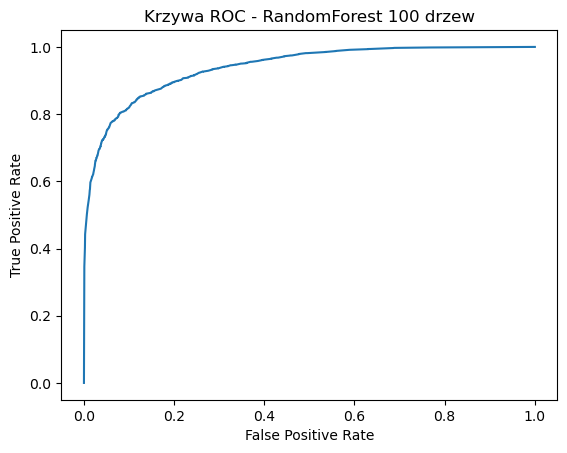

In [55]:
# Predykcje prawdopodobieństw dla danych testowych
y_pred_prob = random_forest_100.predict_proba(X_test)[:, 1]

# Wyznaczenie FPR, TPR i punktów odcięcia dla krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Wykres krzywej ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC - RandomForest 100 drzew')
plt.show()

In [56]:
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Wydruk wyniku
print("Pole pod krzywą ROC:", roc_auc)

Pole pod krzywą ROC: 0.9390985200561089


In [57]:
# model z 10 drzewami
random_forest_10 = RandomForestClassifier(n_estimators = 10, random_state = 1)
random_forest_10.fit(X_train, y_train)
print(classification_report(y_test,random_forest_10.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2314
           1       0.89      0.83      0.86      2440

    accuracy                           0.86      4754
   macro avg       0.86      0.86      0.86      4754
weighted avg       0.86      0.86      0.86      4754



In [58]:
# ocena na zbiorze treningowym i testowym
y_pred_train = random_forest_10.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = random_forest_10.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Dokładność predykcji na zbiorze treningowym:", accuracy_train)
print("Dokładność predykcji na zbiorze testowym:", accuracy_test)

Dokładność predykcji na zbiorze treningowym: 0.9834875893984013
Dokładność predykcji na zbiorze testowym: 0.8584350021034918


In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()

classification_error = (fp + fn) / (tn + tp + fn + fp)
print(classification_error)

0.13651661758519143


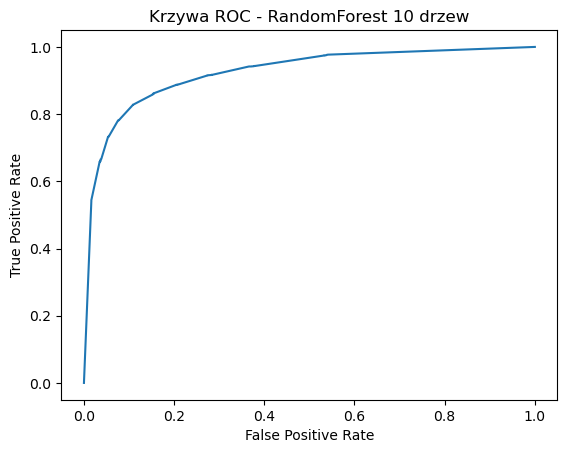

In [60]:
# Predykcje prawdopodobieństw dla danych testowych
y_pred_prob = random_forest_10.predict_proba(X_test)[:, 1]

# Wyznaczenie FPR, TPR i punktów odcięcia dla krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Wykres krzywej ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC - RandomForest 10 drzew')
plt.show()

In [61]:
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Wydruk wyniku
print("Pole pod krzywą ROC:", roc_auc)

Pole pod krzywą ROC: 0.9234926923785369


## XGBOOST

In [62]:
# Domyślnie jest generowanych 100 drzew
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Dopasowanie modelu XGBoost do danych treningowych
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [63]:
# Predykcja dla danych testowych
y_pred_xgb = xgb_model.predict(X_test)

# Obliczenie dokładności 
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Dokładność predykcji: %.2f%%" % (accuracy * 100.0))

Dokładność predykcji: 85.78%


In [64]:
# ocena na zbiorze treningowym i testowym
y_pred_train = xgb_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = xgb_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Dokładność predykcji na zbiorze treningowym:", accuracy_train)
print("Dokładność predykcji na zbiorze testowym:", accuracy_test)

Dokładność predykcji na zbiorze treningowym: 0.8964030290281868
Dokładność predykcji na zbiorze testowym: 0.8578039545645773


In [65]:
# Zdefiniowanie modelu z 10 drzewami
xgb_model_10 = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=10)

# Uczenie modelu
xgb_model_10.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_xgb_10 = xgb_model_10.predict(X_test)

# Dokładność 
accuracy_ = accuracy_score(y_test, y_pred_xgb_10)
print("Dokładność predykcji: %.2f%%" % (accuracy_ * 100.0))

Dokładność predykcji: 83.55%


In [66]:
# błąd klasyfikacji
conf_matrix = confusion_matrix(y_test, y_pred_xgb_10)

tn, fp, fn, tp = conf_matrix.ravel()

classification_error = (fp + fn) / (tn + tp + fn + fp)
print(classification_error)

0.16449305847707194


In [67]:
print(classification_report(y_test,xgb_model_10.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2314
           1       0.87      0.80      0.83      2440

    accuracy                           0.84      4754
   macro avg       0.84      0.84      0.84      4754
weighted avg       0.84      0.84      0.84      4754



In [68]:
roc_auc = roc_auc_score(y_test, y_pred_xgb_10)

# Wydruk wyniku
print("Pole pod krzywą ROC:", roc_auc)

Pole pod krzywą ROC: 0.8364513226688581


In [69]:
# Zdefiniowanie modelu bez określenia liczby drzew
model = xgb.XGBClassifier()

# Wybór zakresu parametru dla liczby drzew n_estimators
param_grid = {'n_estimators': [10, 50, 100, 200, 500]}

# Walidacja krzyżowa z przeszukiwaniem siatki parametrów
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Wybór najlepszego modelu
best_model = grid_search.best_estimator_

# Predykcja na zbiorze testowym
y_pred_m = best_model.predict(X_test)

# Dokładność 
accuracy = accuracy_score(y_test, y_pred_m)
print("Dokładność predykcji na zbiorze testowym: %.2f%%" % (accuracy * 100.0))

# najlepsze parametry
print("Najlepsze parametry: ", grid_search.best_params_)

Dokładność predykcji na zbiorze testowym: 85.86%
Najlepsze parametry:  {'n_estimators': 200}


In [70]:
# Wyznaczenie optymalnych wartości hiperparametrów reg_alpha i reg_lambda

# Tworzymy siatkę hiperparametrów do przetestowania
param_grid = {
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

# Wyznaczenie najlepszych wartości hiperparametrów
best_params = grid_search.best_params_
print("Najlepsze wartości hiperparametrów: ", best_params)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Najlepsze wartości hiperparametrów:  {'reg_alpha': 1, 'reg_lambda': 0.001}


In [54]:
# Konstrukcja modelu XGBoost dla tych otrzymanych hiperparametrów
xgb_model_b = xgb.XGBClassifier(objective="binary:logistic", random_state=1, n_estimators = 200,
                                reg_alpha=1, reg_lambda=0.001)

# Dopasowanie modelu XGBoost na danych treningowych
xgb_model_b.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [55]:
# Ważność cech
feature_importances = xgb_model_b.feature_importances_

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance.reset_index(drop=True, inplace=True)
df_feature_importance['Importance'] = df_feature_importance['Importance'].apply(lambda x: f'{x:.4f}')

print(df_feature_importance)

                      Feature Importance
0         market_segment_type     0.2854
1  required_car_parking_space     0.2198
2      no_of_special_requests     0.1877
3              repeated_guest     0.1106
4                   lead_time     0.0863
5                no_of_people     0.0417
6          avg_price_per_room     0.0390
7                no_of_nights     0.0295


In [72]:
# ocena na zbiorze treningowym i testowym
y_pred_train = xgb_model_b.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = xgb_model_b.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Dokładność predykcji na zbiorze treningowym:", accuracy_train)
print("Dokładność predykcji na zbiorze testowym:", accuracy_test)

Dokładność predykcji na zbiorze treningowym: 0.9342132940681531
Dokładność predykcji na zbiorze testowym: 0.8588557004627682


In [74]:
# błąd klasyfikacji
conf_matrix = confusion_matrix(y_test, y_pred_test)

tn, fp, fn, tp = conf_matrix.ravel()

classification_error = (fp + fn) / (tn + tp + fn + fp)
print(classification_error)

0.14114429953723182


In [75]:
print(classification_report(y_test,xgb_model_b.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2314
           1       0.87      0.85      0.86      2440

    accuracy                           0.86      4754
   macro avg       0.86      0.86      0.86      4754
weighted avg       0.86      0.86      0.86      4754



In [76]:
roc_auc = roc_auc_score(y_test, y_pred_test)

# Wydruk wyniku
print("Pole pod krzywą ROC:", roc_auc)

Pole pod krzywą ROC: 0.8590186958924295


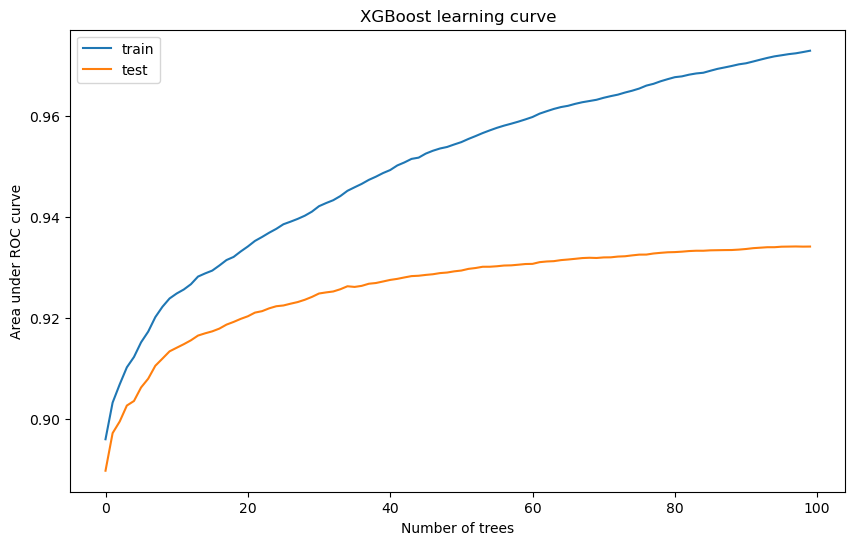

In [77]:
# Walidacja krzyżowa (podział zbioru na 5 części)
# Parametr early_stopping_rounds jest wykorzystywany podczas uczenia modelu, 
# pozwala określić po ilu iteracjach (czyli po jakiej liczbie wygenerowaniu drzew) 
# algorytm ma zakończyć uczenie, jeśli nie nastąpi poprawa wyniku.
results = xgb.cv(dtrain=xgb.DMatrix(X_train, label=y_train), 
                 params=xgb_model_b.get_xgb_params(), num_boost_round=xgb_model.get_params()['n_estimators'], 
                 nfold=5, early_stopping_rounds=10, metrics='auc', as_pandas=True, seed=1)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['train-auc-mean'], label='train')
plt.plot(results.index, results['test-auc-mean'], label='test')
plt.xlabel('Number of trees')
plt.ylabel('Area under ROC curve')
plt.title('XGBoost learning curve')
plt.legend()
plt.show()

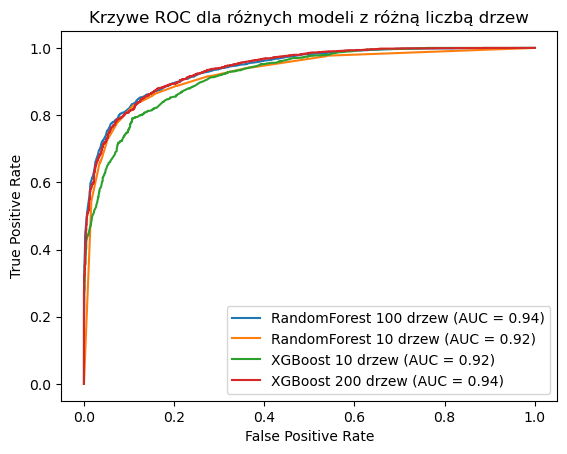

In [78]:
# RandomForest z 100 drzewami
y_pred_prob_rf_100 = random_forest_100.predict_proba(X_test)[:, 1]
fpr_rf_100, tpr_rf_100, thresholds_rf_100 = roc_curve(y_test, y_pred_prob_rf_100)

roc_auc_rf_100 = auc(fpr_rf_100, tpr_rf_100)

plt.plot(fpr_rf_100, tpr_rf_100, label=f'RandomForest 100 drzew (AUC = {roc_auc_rf_100:.2f})')

# RandomForest z 10 drzewami
y_pred_prob_rf_10 = random_forest_10.predict_proba(X_test)[:, 1]
fpr_rf_10, tpr_rf_10, thresholds_rf_10 = roc_curve(y_test, y_pred_prob_rf_10)

roc_auc_rf_10 = auc(fpr_rf_10, tpr_rf_10)

plt.plot(fpr_rf_10, tpr_rf_10, label=f'RandomForest 10 drzew (AUC = {roc_auc_rf_10:.2f})')

# XGB z 10 drzewami
y_pred_prob_xgb_10 = xgb_model_10.predict_proba(X_test)[:, 1]
fpr_xgb_10, tpr_xgb_10, thresholds_xgb_10 = roc_curve(y_test, y_pred_prob_xgb_10)

roc_auc_xgb_10 = auc(fpr_xgb_10, tpr_xgb_10)

plt.plot(fpr_xgb_10, tpr_xgb_10, label=f'XGBoost 10 drzew (AUC = {roc_auc_xgb_10:.2f})')

# XGB z 200 drzewami
y_pred_prob_xgb_200 = xgb_model_b.predict_proba(X_test)[:, 1]
fpr_xgb_200, tpr_xgb_200, thresholds_xgb_200 = roc_curve(y_test, y_pred_prob_xgb_200)

roc_auc_xgb_200 = auc(fpr_xgb_200, tpr_xgb_200)

plt.plot(fpr_xgb_200, tpr_xgb_200, label=f'XGBoost 200 drzew (AUC = {roc_auc_xgb_200:.2f})')


# Ustawienia etykiet i tytułu
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC dla różnych modeli z różną liczbą drzew')
plt.legend()
plt.show()


# Sieci neuronowe

In [79]:
df_sieci.head()

,required_car_parking_space,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,no_of_people,no_of_nights,booking_status
0,0,224,3,0,65.00,0,0.158982,-0.168923,0
1,0,5,4,0,106.68,1,0.158982,0.987358,0
2,0,1,4,0,60.00,0,-0.840274,-0.983180,1
3,0,211,4,0,100.00,0,0.158982,-0.339934,1
4,0,48,4,0,94.50,0,0.158982,-1.154192,1


In [34]:
# bilansowanie próby
original_df = df_sieci.copy()
canceled_df = original_df[original_df['booking_status'] == 1]
np.random.seed(123)
not_canceled_sample = original_df[original_df['booking_status'] == 0].sample(11885, random_state=1)
final_df = pd.concat([canceled_df, not_canceled_sample])

In [35]:
X = final_df.drop(['booking_status'], axis=1).copy()
y = final_df['booking_status'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
# Przekształcanie zmiennych ciągłych
num_transformer = StandardScaler()

# Przekształcanie zmiennych jakościowych
cat_transformer = OneHotEncoder()

In [37]:
print(df_sieci['required_car_parking_space'].unique())
print(df_sieci['market_segment_type'].unique())
print(df_sieci['repeated_guest'].unique())
print(df_sieci['no_of_special_requests'].unique())

[0 1]
[3 4 2 0 1]
[0 1]
[0 1 3 2 4 5]


In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['lead_time', 'avg_price_per_room', 'no_of_people', 'no_of_nights']),
        ('cat', cat_transformer, ['required_car_parking_space', 'market_segment_type', 'repeated_guest',
                                  'no_of_special_requests'])
    ]) 

In [39]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [40]:
X_train_np = X_train_transformed
X_test_np = X_test_transformed
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [41]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

## Sieć 1

In [88]:
# Utworzenie obiektu modelu za pomocą klasy Sequential.
siec1 = Sequential()
# Dodanie dwóch warstw za pomocą metody add(). 
# Pierwsza warstwa (Dense) składa się z 3 neuronów i funkcji aktywacji ReLU. 
# Argument input_dim określa liczbę wejść w pierwszej warstwie,
# która jest równa liczbie kolumn w zbiorze X_train_np. 
siec1.add(Dense(3, input_dim=X_train_np.shape[1], activation='relu'))
# Druga warstwa składa się z jednego neuronu i sigmoidalnej funkcji aktywacji - binarna klasyfikacja.
siec1.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
# Metoda compile() definiuje funkcję celu, optymalizator i statystyki do oceny skuteczności modelu. 
# Funkcja celu dla problemu binarnej klasyfikacji to "binary_crossentropy". 
# Adam - Adaptive Moment Estimation to adaptacyjny algorytm optymalizacji, 
# który łączy w sobie zalety dwóch innych algorytmów optymalizacji, tj. RMSProp i AdaGrad. 
# Statystyką oceny jakości predykcji jest dokładność.
siec1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Uczenie modelu
# Model jest uczony na danych treningowych za pomocą metody fit(). 
# Argument epochs określa liczbę epok.
# Argument batch_size określa liczbę próbek wykorzystanych w jednej iteracji podczas trenowania modelu.
siec1.fit(X_train_np, y_train_np, epochs=50, batch_size=10)



Epoch 1/50


1902/1902 [==============================] - 4s 2ms/step - loss: 0.5373 - accuracy: 0.7208
Epoch 2/50
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4592 - accuracy: 0.7804
Epoch 3/50
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4538 - accuracy: 0.7827
Epoch 4/50
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4514 - accuracy: 0.7827
Epoch 5/50
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4498 - accuracy: 0.7848
Epoch 6/50
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4488 - accuracy: 0.7857
Epoch 7/50
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4480 - accuracy: 0.7862
Epoch 8/50
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4475 - accuracy: 0.7897
Epoch 9/50
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4477 - accuracy: 0.7864
Epoch 10/50
1902/1902 [==============================] - 3s 2ms/step - loss: 0

### Ocena sieci 1

In [89]:
# Dokładność predykcji na danych uczących
accuracy_train = siec1.evaluate(X_train_np, y_train_np)
print('Accuracy: %.2f' % (accuracy_train[1]*100))

595/595 [==============================] - 1s 1ms/step - loss: 0.4442 - accuracy: 0.7883
Accuracy: 78.83


In [90]:
# Dokładność predykcji na danych testowych
accuracy_test = siec1.evaluate(X_test_np, y_test_np)
print('Accuracy: %.2f' % (accuracy_test[1]*100))

149/149 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.7903
Accuracy: 79.03


149/149 [==============================] - 0s 2ms/step
[[1790  524]
 [ 473 1967]]
ROC AUC: 0.8730553154710458


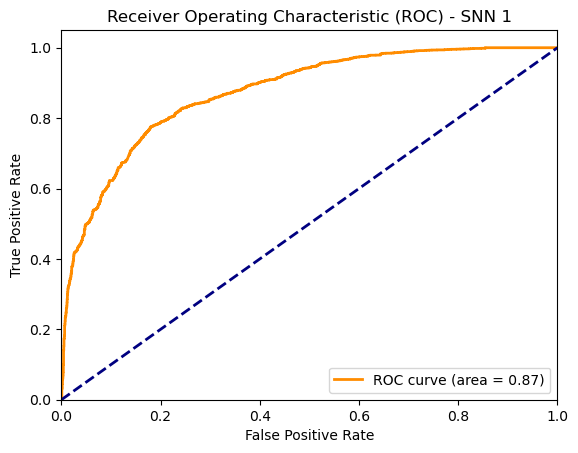

In [91]:
# Wyznaczenie macierzy pomyłek na zbiorze uczącycm, punkt odcięcia 0.5
y_pred_s1 = siec1.predict(X_test_np)
y_pred_class_s1 = (y_pred_s1 > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_np, y_pred_class_s1)
print(conf_matrix)

# Wyznaczanie krzywej ROC i pola pod krzywą ROC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_s1 )
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_s1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SNN 1')
plt.legend(loc="lower right")
plt.show()

## Sieć 2

In [92]:
# Zmniejszenie liczby neuronów w pierwszej warstwie ukrytej z 3 do 2
# i liczby epok do 20
# Przygotowanie modelu sieci neuronowej
siec2 = Sequential()
siec2.add(Dense(2, input_dim=X_train_np.shape[1], activation='relu'))
siec2.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
siec2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Uczenie modelu
siec2.fit(X_train_np, y_train_np, epochs=20, batch_size=10)

Epoch 1/20
1902/1902 [==============================] - 4s 2ms/step - loss: 0.5865 - accuracy: 0.6749
Epoch 2/20
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4765 - accuracy: 0.7769
Epoch 3/20
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4681 - accuracy: 0.7793
Epoch 4/20
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4664 - accuracy: 0.7803
Epoch 5/20
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4654 - accuracy: 0.7794
Epoch 6/20
1902/1902 [==============================] - 4s 2ms/step - loss: 0.4648 - accuracy: 0.7796
Epoch 7/20
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4643 - accuracy: 0.7803
Epoch 8/20
1902/1902 [==============================] - 3s 1ms/step - loss: 0.4640 - accuracy: 0.7797
Epoch 9/20
1902/1902 [==============================] - 3s 1ms/step - loss: 0.4642 - accuracy: 0.7810
Epoch 10/20
1902/1902 [==============================] - 3s 1ms/step - loss: 0.464

### Ocena sieci 2

In [93]:
#Dokładność predykcji na danych uczących
accuracy_train = siec2.evaluate(X_train_np, y_train_np)
print('Accuracy: %.2f' % (accuracy_train[1]*100))

595/595 [==============================] - 1s 1ms/step - loss: 0.4634 - accuracy: 0.7840
Accuracy: 78.40


In [94]:
#Dokładność predykcji na danych testowych
accuracy_test = siec2.evaluate(X_test_np, y_test_np)
print('Accuracy: %.2f' % (accuracy_test[1]*100))

149/149 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7819
Accuracy: 78.19


149/149 [==============================] - 0s 1ms/step
[[1865  449]
 [ 588 1852]]
ROC AUC: 0.8602522776541933


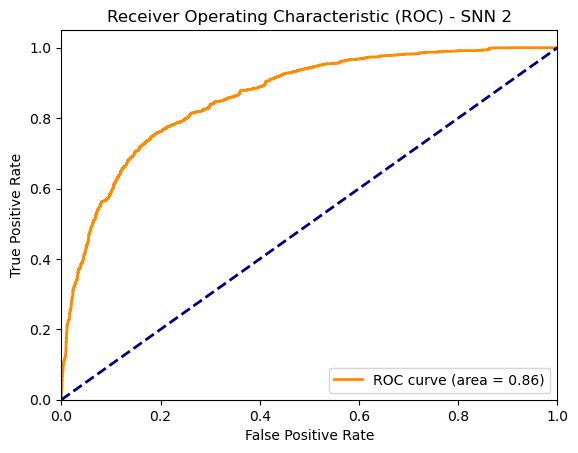

In [95]:
y_pred_s2 = siec2.predict(X_test_np)
y_pred_class_s2 = (y_pred_s2 > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_np, y_pred_class_s2)
print(conf_matrix)

# Wyznaczanie krzywej ROC i pola pod krzywą ROC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_s2 )
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_s2)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SNN 2')
plt.legend(loc="lower right")
plt.show()

## Wybór liczby epok

In [96]:
# Definicja obiektu EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Przygotowanie modelu sieci neuronowej
siec3t = Sequential()
siec3t.add(Dense(2, input_dim=X_train_np.shape[1], activation='relu'))
siec3t.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
siec3t.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trenowanie modelu z EarlyStopping
siec3t.fit(X_train_np, y_train_np, epochs=100, batch_size=10, 
           validation_data=(X_test_np, y_test_np), 
           callbacks=[early_stopping])

Epoch 1/100
1902/1902 [==============================] - 4s 2ms/step - loss: 0.5677 - accuracy: 0.7267 - val_loss: 0.5088 - val_accuracy: 0.7730
Epoch 2/100
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4948 - accuracy: 0.7805 - val_loss: 0.4846 - val_accuracy: 0.7783
Epoch 3/100
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4795 - accuracy: 0.7848 - val_loss: 0.4766 - val_accuracy: 0.7791
Epoch 4/100
1902/1902 [==============================] - 4s 2ms/step - loss: 0.4736 - accuracy: 0.7857 - val_loss: 0.4731 - val_accuracy: 0.7817
Epoch 5/100
1902/1902 [==============================] - 4s 2ms/step - loss: 0.4701 - accuracy: 0.7865 - val_loss: 0.4696 - val_accuracy: 0.7808
Epoch 6/100
1902/1902 [==============================] - 4s 2ms/step - loss: 0.4679 - accuracy: 0.7857 - val_loss: 0.4696 - val_accuracy: 0.7802
Epoch 7/100
1902/1902 [==============================] - 4s 2ms/step - loss: 0.4663 - accuracy: 0.7868 - val_loss: 0.4668 - val_ac

## Sieć 3

In [97]:
# Zmniejszenie liczby epok do 15
# Przygotowanie modelu sieci neuronowej
siec3 = Sequential()
siec3.add(Dense(2, input_dim=X_train_np.shape[1], activation='relu'))
siec3.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
siec3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Uczenie modelu
siec3.fit(X_train_np, y_train_np, epochs=15, batch_size=10)

Epoch 1/15
1902/1902 [==============================] - 4s 2ms/step - loss: 0.6131 - accuracy: 0.6675
Epoch 2/15
1902/1902 [==============================] - 4s 2ms/step - loss: 0.4964 - accuracy: 0.7771
Epoch 3/15
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4736 - accuracy: 0.7790
Epoch 4/15
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4650 - accuracy: 0.7802
Epoch 5/15
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4608 - accuracy: 0.7815
Epoch 6/15
1902/1902 [==============================] - 4s 2ms/step - loss: 0.4582 - accuracy: 0.7806
Epoch 7/15
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4561 - accuracy: 0.7826
Epoch 8/15
1902/1902 [==============================] - 3s 2ms/step - loss: 0.4546 - accuracy: 0.7855
Epoch 9/15
1902/1902 [==============================] - 3s 1ms/step - loss: 0.4540 - accuracy: 0.7844
Epoch 10/15
1902/1902 [==============================] - 3s 2ms/step - loss: 0.453

### Ocena sieci 3

In [98]:
#Dokładność predykcji na danych uczących
accuracy_train = siec3.evaluate(X_train_np, y_train_np)
print('Accuracy: %.2f' % (accuracy_train[1]*100))

595/595 [==============================] - 1s 1ms/step - loss: 0.4505 - accuracy: 0.7872
Accuracy: 78.72


In [99]:
#Dokładność predykcji na danych testowych
accuracy_test = siec3.evaluate(X_test_np, y_test_np)
print('Accuracy: %.2f' % (accuracy_test[1]*100))

149/149 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7852
Accuracy: 78.52


149/149 [==============================] - 0s 1ms/step
[[1798  516]
 [ 505 1935]]
ROC AUC: 0.8675788500502997


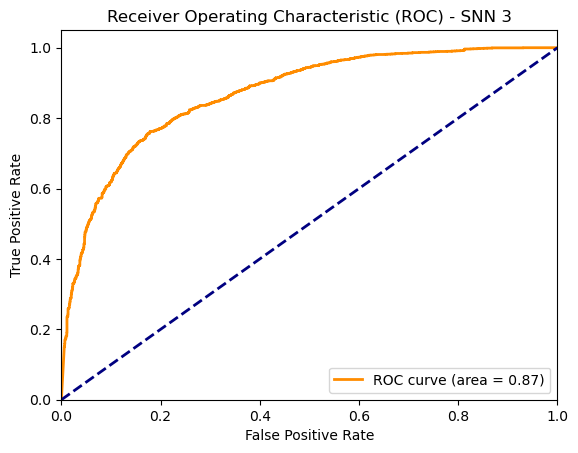

In [100]:
y_pred_s3 = siec3.predict(X_test_np)
y_pred_class_s3 = (y_pred_s3 > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_np, y_pred_class_s3)
print(conf_matrix)

# Wyznaczanie krzywej ROC i pola pod krzywą ROC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_s3)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_s3)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SNN 3')
plt.legend(loc="lower right")
plt.show()

## Sieć 4

In [101]:
# Wybór liczy epok ze względu na pole pod krzywą ROC
# Definicja ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='best_model.keras', monitor='val_auc', 
                             save_best_only=True, mode='max', verbose=1)

# Przygotowanie modelu sieci neuronowej
siec4 = Sequential()
siec4.add(Dense(2, input_dim=X_train_np.shape[1], activation='relu'))
siec4.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
siec4.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Uczenie modelu z callbackiem ModelCheckpoint
siec4.fit(X_train_np, y_train_np, epochs=50, batch_size=10, 
          validation_data=(X_test_np, y_test_np), callbacks=[checkpoint])

Epoch 1/50
1894/1902 [============================>.] - ETA: 0s - loss: 0.6050 - accuracy: 0.6864 - auc: 0.7762
Epoch 1: val_auc improved from -inf to 0.84645, saving model to best_model.keras
1902/1902 [==============================] - 5s 2ms/step - loss: 0.6047 - accuracy: 0.6866 - auc: 0.7765 - val_loss: 0.5271 - val_accuracy: 0.7772 - val_auc: 0.8464
Epoch 2/50
1887/1902 [============================>.] - ETA: 0s - loss: 0.4969 - accuracy: 0.7797 - auc: 0.8524
Epoch 2: val_auc improved from 0.84645 to 0.85426, saving model to best_model.keras
1902/1902 [==============================] - 4s 2ms/step - loss: 0.4970 - accuracy: 0.7793 - auc: 0.8521 - val_loss: 0.4861 - val_accuracy: 0.7804 - val_auc: 0.8543
Epoch 3/50
1901/1902 [============================>.] - ETA: 0s - loss: 0.4754 - accuracy: 0.7796 - auc: 0.8600
Epoch 3: val_auc improved from 0.85426 to 0.85912, saving model to best_model.keras
1902/1902 [==============================] - 4s 2ms/step - loss: 0.4754 - accuracy: 0

### Ocena sieci 4

In [102]:
#Dokładność predykcji na danych uczących
accuracy_train = siec4.evaluate(X_train_np, y_train_np)
print('Accuracy: %.2f' % (accuracy_train[1]*100))

595/595 [==============================] - 1s 1ms/step - loss: 0.4485 - accuracy: 0.7900 - auc: 0.8715
Accuracy: 79.00


In [103]:
#Dokładność predykcji na danych testowych
accuracy_test = siec4.evaluate(X_test_np, y_test_np)
print('Accuracy: %.2f' % (accuracy_test[1]*100))

149/149 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7899 - auc: 0.8708
Accuracy: 78.99


149/149 [==============================] - 0s 1ms/step
[[1756  558]
 [ 441 1999]]
ROC AUC: 0.8708047593408618


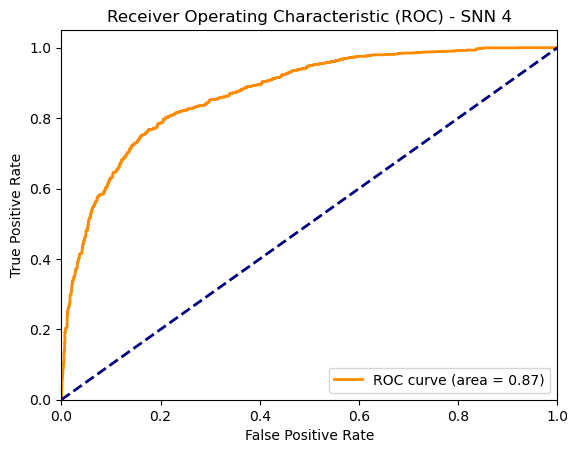

In [104]:
y_pred_s4 = siec4.predict(X_test_np)
y_pred_class_s4 = (y_pred_s4 > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_np, y_pred_class_s4)
print(conf_matrix)

# Wyznaczanie krzywej ROC i pola pod krzywą ROC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_s4)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_s4)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SNN 4')
plt.legend(loc="lower right")
plt.show()

## Wybór liczby warstw i liczby neuronów z wykorzystaniem kroswalidacji

In [105]:
def create_model(neurons=1, hidden_layers=1):
    model = Sequential()
    model.add(Input(shape=(X_train_np.shape[1],)))  # Dodanie warstwy Input
    model.add(Dense(neurons, activation='relu'))    # Pierwsza warstwa Dense już bez input_dim
    for i in range(1, hidden_layers):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [106]:
# Zdefiniowanie modelu
siec_cv = KerasClassifier(model=create_model, verbose=0)

# Zdefiniowanie zakresu parametrów do przetestowania
neurons = [1, 5, 10, 15]
hidden_layers = [1, 2, 3]

# Zdefiniowanie siatki parametrów do przetestowania
#param_grid = dict(neurons=neurons, hidden_layers=hidden_layers)
param_grid = {
    'model__neurons': neurons, 
    'model__hidden_layers': hidden_layers
}

# Wywołanie obiektu klasy GridSearchCV i przeprowadzenie walidacji krzyżowej (podział zbioru na 5 części)
grid = GridSearchCV(estimator=siec_cv, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train_np, y_train_np)

# Wyświetlenie najlepszych wyników i ich parametrów
print("Najlepszy wynik: %f, uzyskany dla parametrów: %s" 
      % (grid_result.best_score_, grid_result.best_params_))

Najlepszy wynik: 0.788599, uzyskany dla parametrów: {'model__hidden_layers': 2, 'model__neurons': 15}


In [107]:
grid_result.cv_results_

{'mean_fit_time': array([1.25509748, 1.13632855, 1.15119143, 1.15823379, 1.33537102,
        1.31530824, 1.38582969, 1.41283226, 1.46466455, 1.54846535,
        1.56905718, 1.48371205]),
 'std_fit_time': array([0.05355257, 0.00235362, 0.02123693, 0.037545  , 0.06336682,
        0.01390856, 0.12109285, 0.13406832, 0.02214753, 0.06807838,
        0.14753042, 0.00482517]),
 'mean_score_time': array([0.26637359, 0.23252664, 0.28749251, 0.23511839, 0.24225006,
        0.23877692, 0.2391119 , 0.25908813, 0.24621162, 0.25465388,
        0.25341649, 0.25391445]),
 'std_score_time': array([0.03147973, 0.00337227, 0.1078184 , 0.003685  , 0.00816011,
        0.00208346, 0.00037685, 0.03150654, 0.00376489, 0.00197487,
        0.00636225, 0.01033442]),
 'param_model__hidden_layers': masked_array(data=[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             d

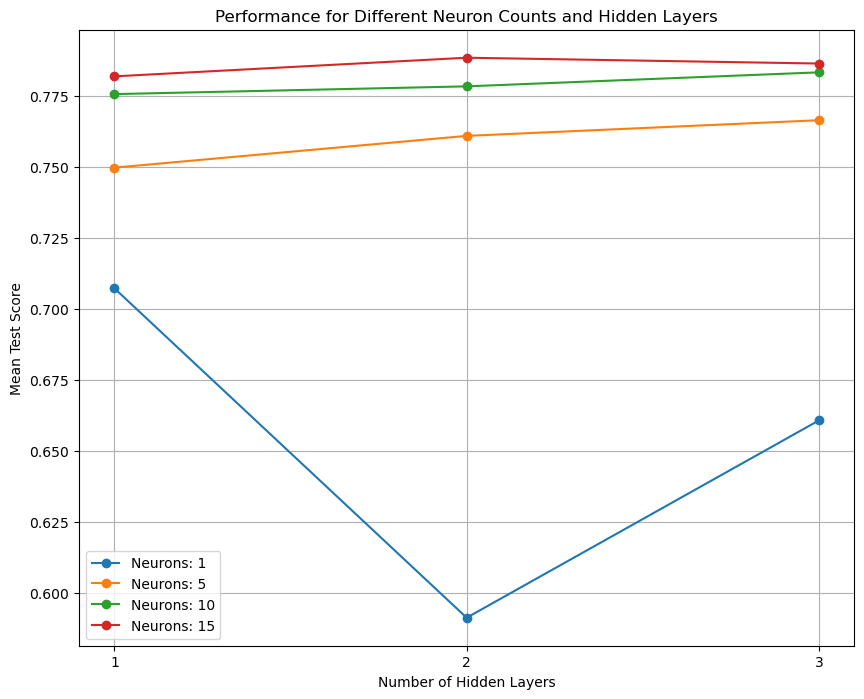

In [108]:
# Dane wejściowe
data = {
    'mean_fit_time': np.array([1.24377499, 1.22391458, 1.46449795, 1.39638534, 1.49055786,
        1.49630251, 1.58425298, 1.57679534, 1.70960269, 1.71210294,
        1.71896958, 1.69106894]),
    'param_model__hidden_layers': np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
    'param_model__neurons': np.array([1, 5, 10, 15, 1, 5, 10, 15, 1, 5, 10, 15]),
    'mean_test_score': np.array([0.70730026, 0.74984342, 0.77576769, 0.78202577, 0.5911384 ,
        0.76104265, 0.77850269, 0.7885994 , 0.66071505, 0.76656494,
        0.78344572, 0.78654892])
}

# Przygotowanie danych do wykresu
unique_hidden_layers = np.unique(data['param_model__hidden_layers'])
unique_neurons = np.unique(data['param_model__neurons'])

# Mapowanie wyników do macierzy dla wizualizacji
scores_matrix = np.zeros((len(unique_neurons), len(unique_hidden_layers)))

for i, neuron_count in enumerate(unique_neurons):
    for j, layer_count in enumerate(unique_hidden_layers):
        # Wyszukanie i przypisanie odpowiedniego wyniku do macierzy
        idx = np.where((data['param_model__neurons'] == neuron_count) & (data['param_model__hidden_layers'] == layer_count))
        scores_matrix[i, j] = data['mean_test_score'][idx]

# Tworzenie wykresu
plt.figure(figsize=(10, 8))
for idx, neuron_count in enumerate(unique_neurons):
    plt.plot(unique_hidden_layers, scores_matrix[idx, :], marker='o', label=f'Neurons: {neuron_count}')

plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Test Score')
plt.title('Performance for Different Neuron Counts and Hidden Layers')
plt.legend()
plt.grid(True)
plt.xticks(unique_hidden_layers)  # Set x-ticks to be the hidden layers
plt.show()

#### Na podstawie wykresu wybieram 15 neuronów z 2 hidden layers

## Sieć 5

In [42]:
siec5 = Sequential()
siec5.add(Dense(15, input_dim=X_train_np.shape[1], activation='relu'))
siec5.add(Dense(15, activation='relu'))
siec5.add(Dense(1, activation='sigmoid'))

siec5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#epochs=47 na podstawie sieci4
siec5.fit(X_train_np, y_train_np, epochs=47, batch_size=10)


Epoch 1/47


1902/1902 [==============================] - 9s 3ms/step - loss: 0.4800 - accuracy: 0.7685
Epoch 2/47
1902/1902 [==============================] - 5s 3ms/step - loss: 0.4392 - accuracy: 0.7915
Epoch 3/47
1902/1902 [==============================] - 5s 3ms/step - loss: 0.4316 - accuracy: 0.7936
Epoch 4/47
1902/1902 [==============================] - 7s 4ms/step - loss: 0.4272 - accuracy: 0.7953
Epoch 5/47
1902/1902 [==============================] - 6s 3ms/step - loss: 0.4230 - accuracy: 0.7964
Epoch 6/47
1902/1902 [==============================] - 8s 4ms/step - loss: 0.4202 - accuracy: 0.7989
Epoch 7/47
1902/1902 [==============================] - 8s 4ms/step - loss: 0.4173 - accuracy: 0.7998
Epoch 8/47
1902/1902 [==============================] - 8s 4ms/step - loss: 0.4158 - accuracy: 0.8019
Epoch 9/47
1902/1902 [==============================] - 6s 3ms/step - loss: 0.4148 - accuracy: 0.8047
Epoch 10/47
1902/1902 [==============================] - 6s 3ms/step - loss: 0.

### Ocena sieci 5

In [44]:
#Dokładność predykcji na danych uczących
accuracy_train = siec5.evaluate(X_train_np, y_train_np)
print('Accuracy: %.2f' % (accuracy_train[1]*100))

595/595 [==============================] - 3s 4ms/step - loss: 0.3843 - accuracy: 0.8203
Accuracy: 82.03


In [45]:
#Dokładność predykcji na danych testowych
accuracy_test = siec5.evaluate(X_test_np, y_test_np)
print('Accuracy: %.2f' % (accuracy_test[1]*100))

149/149 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8180
Accuracy: 81.80


149/149 [==============================] - 0s 1ms/step
[[1927  387]
 [ 489 1951]]
ROC AUC: 0.900733418819162


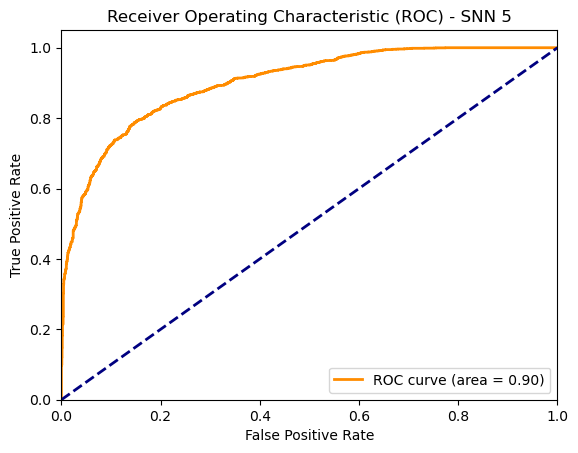

In [112]:
y_pred_s5 = siec5.predict(X_test_np)
y_pred_class_s5 = (y_pred_s5 > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_np, y_pred_class_s5)
print(conf_matrix)

# Wyznaczanie krzywej ROC i pola pod krzywą ROC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_s5)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_s5)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SNN 5')
plt.legend(loc="lower right")
plt.show()

## Porównanie sieci

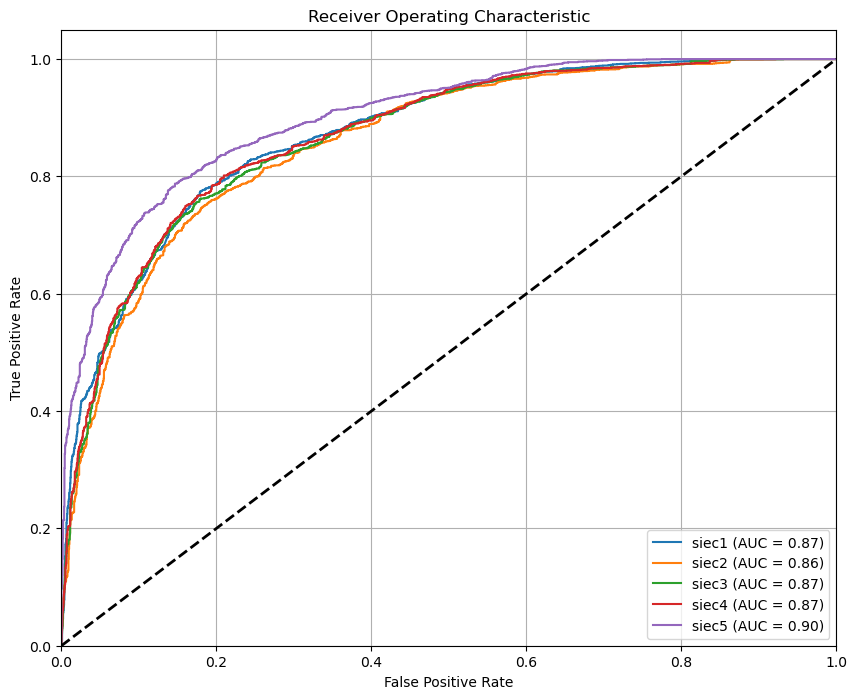

In [113]:
# Obliczanie współczynników dla krzywej ROC
fpr1, tpr1, thresholds1 = roc_curve(y_test_np, y_pred_s1)
fpr2, tpr2, thresholds2 = roc_curve(y_test_np, y_pred_s2)
fpr3, tpr3, thresholds3 = roc_curve(y_test_np, y_pred_s3)
fpr4, tpr4, thresholds4 = roc_curve(y_test_np, y_pred_s4)
fpr5, tpr5, thresholds5 = roc_curve(y_test_np, y_pred_s5)

# Obliczanie obszarów pod krzywymi (AUC)
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
auc4 = auc(fpr4, tpr4)
auc5 = auc(fpr5, tpr5)

# Rysowanie wykresów
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'siec1 (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'siec2 (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'siec3 (AUC = {auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'siec4 (AUC = {auc4:.2f})')
plt.plot(fpr5, tpr5, label=f'siec5 (AUC = {auc5:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Linia dla losowego klasyfikatora
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [114]:
# Obliczanie współczynnika Gini
gini1 = 2 * auc1 - 1
gini2 = 2 * auc2 - 1
gini3 = 2 * auc3 - 1
gini4 = 2 * auc4 - 1
gini5 = 2 * auc5 - 1

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
auc4 = auc(fpr4, tpr4)
auc5 = auc(fpr5, tpr5)

gini_values = [gini1, gini2, gini3, gini4, gini5]
auc_values = [auc1, auc2, auc3, auc4, auc5]

df_comp = pd.DataFrame({
    "Model": ["siec1", "siec2", "siec3", "siec4", "siec5"],
    "AUC": list(auc_values),
    "Gini": list(gini_values)
})

df_comp = df_comp.round(3)
df_comp.index = range(1, len(df_comp) + 1)
df_comp

def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

styled_df = df_comp.style.apply(highlight_max, subset=['AUC', 'Gini'])
styled_df

,Model,AUC,Gini
1,siec1,0.873000,0.746000
2,siec2,0.860000,0.721000
3,siec3,0.868000,0.735000
4,siec4,0.871000,0.742000
5,siec5,0.901000,0.801000


## Analiza najlepszego modelu - sieć 5

In [115]:
siec5 = Sequential()
siec5.add(Dense(15, input_dim=X_train_np.shape[1], activation='relu'))
siec5.add(Dense(15, activation='relu'))
siec5.add(Dense(1, activation='sigmoid'))

siec5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

history = siec5.fit(X_train_np, y_train_np, epochs=47, batch_size=10, validation_split=0.2)

Epoch 1/47
1522/1522 [==============================] - 4s 2ms/step - loss: 0.4971 - accuracy: 0.7566 - mse: 0.1643 - val_loss: 0.4534 - val_accuracy: 0.7844 - val_mse: 0.1476
Epoch 2/47
1522/1522 [==============================] - 3s 2ms/step - loss: 0.4476 - accuracy: 0.7894 - mse: 0.1456 - val_loss: 0.4383 - val_accuracy: 0.7989 - val_mse: 0.1424
Epoch 3/47
1522/1522 [==============================] - 3s 2ms/step - loss: 0.4363 - accuracy: 0.7964 - mse: 0.1421 - val_loss: 0.4382 - val_accuracy: 0.7926 - val_mse: 0.1431
Epoch 4/47
1522/1522 [==============================] - 3s 2ms/step - loss: 0.4307 - accuracy: 0.7994 - mse: 0.1402 - val_loss: 0.4271 - val_accuracy: 0.8055 - val_mse: 0.1387
Epoch 5/47
1522/1522 [==============================] - 3s 2ms/step - loss: 0.4257 - accuracy: 0.8036 - mse: 0.1384 - val_loss: 0.4231 - val_accuracy: 0.8010 - val_mse: 0.1376
Epoch 6/47
1522/1522 [==============================] - 3s 2ms/step - loss: 0.4227 - accuracy: 0.8024 - mse: 0.1375 - va

In [116]:
siec5.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_196 (Dense)           (None, 15)                300       
                                                                 
 dense_197 (Dense)           (None, 15)                240       
                                                                 
 dense_198 (Dense)           (None, 1)                 16        
                                                                 
Total params: 556 (2.17 KB)
Trainable params: 556 (2.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


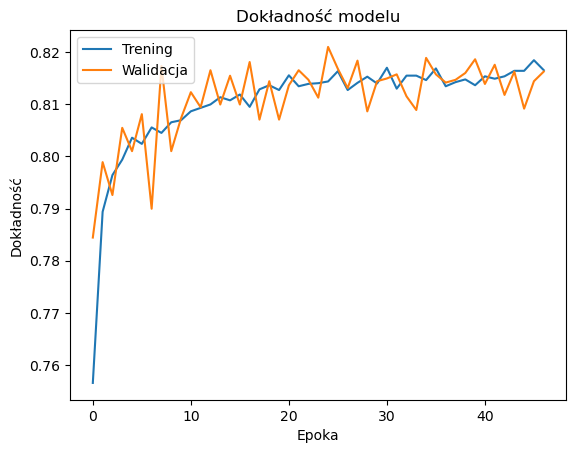

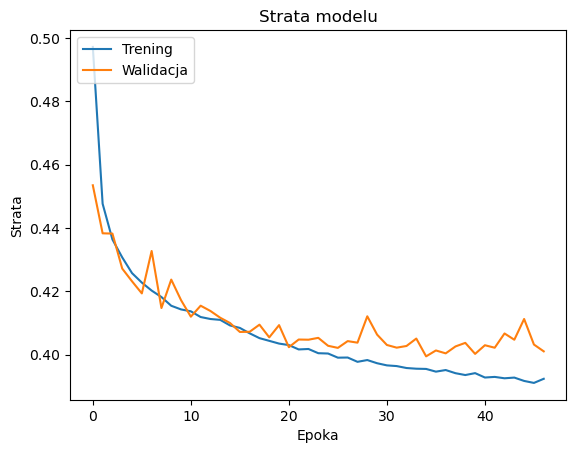

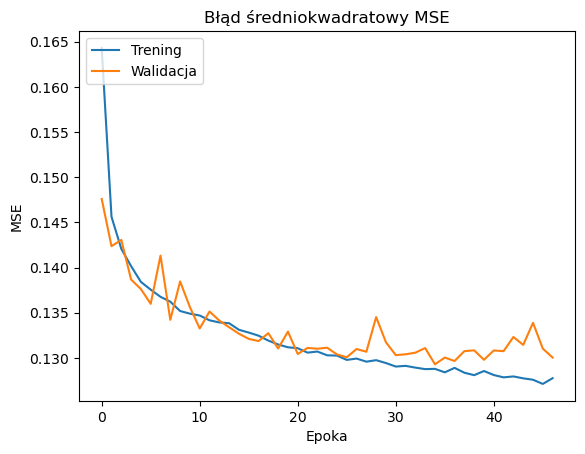

In [117]:
# Dokładność
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Dokładność modelu')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['Trening', 'Walidacja'], loc='upper left')
plt.show()

# Strata
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Strata modelu')
plt.ylabel('Strata')
plt.xlabel('Epoka')
plt.legend(['Trening', 'Walidacja'], loc='upper left')
plt.show()

# MSE
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Błąd średniokwadratowy MSE')
plt.ylabel('MSE')
plt.xlabel('Epoka')
plt.legend(['Trening', 'Walidacja'], loc='upper left')
plt.show()

In [118]:
for i, layer in enumerate(siec5.layers):
    weights, biases = layer.get_weights()
    print(f"Warstwa {i+1}:")
    print("Wagi:")
    print(weights)
    print("Biasy:")
    print(biases)
    print("\n")

Warstwa 1:
Wagi:
[[ 1.47762328e-01 -9.26284730e-01  7.94351161e-01  3.52685712e-02
  -1.06878543e+00  4.31127369e-01  1.46783292e-02 -1.22130919e+00
   3.24415445e-01 -2.91195571e-01  3.05188783e-02  5.88569999e-01
  -6.53841734e-01 -9.93214905e-01  6.84227526e-01]
 [-6.04227841e-01  4.26150531e-01 -9.24743950e-01  2.48785079e-01
  -1.09845988e-01 -1.31587014e-02  3.79546955e-02  1.04710788e-01
   1.23161748e-01 -2.29552746e-01 -1.39056921e-01  1.03882647e+00
   5.93377888e-01 -3.10086757e-01  1.21930860e-01]
 [-2.85744518e-01 -2.94779956e-01  1.30741715e-01 -6.26281500e-02
   1.42863644e-02  7.91528165e-01  6.27370775e-01  3.64074181e-03
   9.09249124e-04 -1.26745597e-01  3.68512064e-01  7.74687752e-02
   2.46150851e-01 -2.70879447e-01  2.72284448e-01]
 [ 1.64166018e-01 -1.46562129e-01  1.43017294e-02  3.57064545e-01
   4.07124460e-02 -2.71535456e-01 -6.19860411e-01 -3.52716297e-01
  -5.26047587e-01  4.93022054e-01 -1.85847238e-01  5.02466857e-01
   4.51037973e-01 -6.37897551e-01 -5.8